In [13]:
# !pip install scanpy

import pandas as pd
import scanpy as sc
from sklearn.metrics import roc_auc_score
import anndata
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#make a shortcut to emily's shared drive folder in your drive so you can access the data at

Mounted at /content/drive


In [3]:
adata=sc.read_h5ad('/content/drive/My Drive/methyl_impute/adult_cortex_CG_CH.h5ad')
real_labels = adata.obs['L3']
# adata = adata.to_df()

In [43]:
final_mask = pd.read_parquet('/content/drive/My Drive/methyl_impute/final_imputation_mask.parq')

In [5]:
test_predictions_top_genes = pd.read_pickle('/content/drive/My Drive/methyl_impute/test_predictions_top_genes.pickle')

In [6]:
test_predictions_top_genes = test_predictions_top_genes.drop(['L3'], axis=1)

In [7]:
real_data = adata.to_df().loc[test_predictions_top_genes.index.values][test_predictions_top_genes.columns.values]
real_data.shape

(3942, 351)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


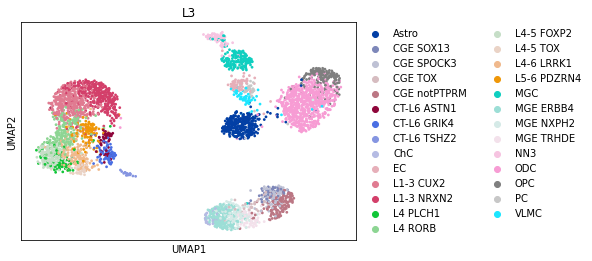

In [10]:
real_temp = sc.AnnData(real_data, obs=pd.DataFrame(adata.obs.loc[test_predictions_top_genes.index]['L3']))
sc.tl.pca(real_temp)
sc.pp.neighbors(real_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(real_temp)
sc.pl.umap(real_temp, color='L3')

In [11]:
final_mask = final_mask.loc[real_data.index.values][real_data.columns.values]
final_mask.shape

(3942, 351)

In [21]:
original_imputed = np.multiply(real_temp.X, final_mask) + np.multiply(test_predictions_top_genes.values, 1-final_mask)

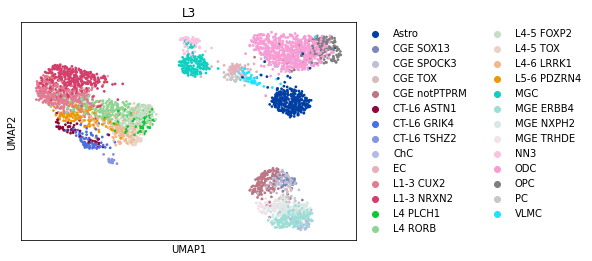

In [22]:
imputed_temp = sc.AnnData(original_imputed, obs=real_temp.obs)
sc.tl.pca(imputed_temp)
sc.pp.neighbors(imputed_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(imputed_temp)
sc.pl.umap(imputed_temp, color='L3')

In [ ]:
test_predictions_top_genes_plus_25 = pd.read_pickle('/content/drive/My Drive/methyl_impute/test_predictions_top_genes_plus_25.pickle')

In [25]:
test_predictions_top_genes_plus_25 = test_predictions_top_genes_plus_25.drop(['L3'], axis=1)

In [26]:
real_data = adata.to_df().loc[test_predictions_top_genes_plus_25.index.values][test_predictions_top_genes_plus_25.columns.values]
real_data.shape

(3942, 11381)

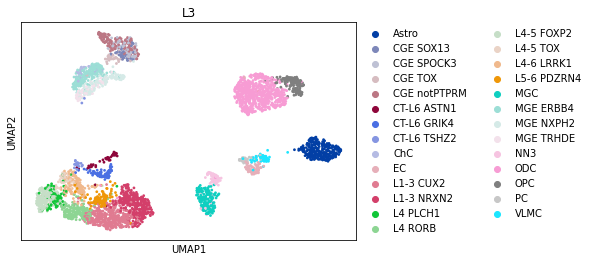

In [27]:
real_temp = sc.AnnData(real_data, obs=pd.DataFrame(adata.obs.loc[test_predictions_top_genes_plus_25.index]['L3']))
sc.tl.pca(real_temp)
sc.pp.neighbors(real_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(real_temp)
sc.pl.umap(real_temp, color='L3')

In [28]:
final_mask = final_mask.loc[real_data.index.values][real_data.columns.values]
final_mask.shape

(3942, 11381)

In [29]:
original_imputed = np.multiply(real_temp.X, final_mask) + np.multiply(test_predictions_top_genes_plus_25.values, 1-final_mask)

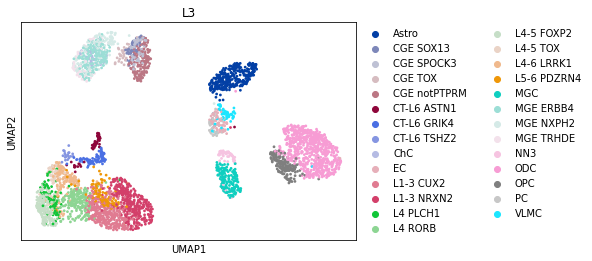

In [30]:
imputed_temp = sc.AnnData(original_imputed, obs=real_temp.obs)
sc.tl.pca(imputed_temp)
sc.pp.neighbors(imputed_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(imputed_temp)
sc.pl.umap(imputed_temp, color='L3')

In [31]:
test_predictions_top_genes_plus_50 = pd.read_pickle('/content/drive/My Drive/methyl_impute/test_predictions_top_genes_plus_50.pickle')

In [32]:
test_predictions_top_genes_plus_50 = test_predictions_top_genes_plus_50.drop(['L3'], axis=1)

In [33]:
real_data = adata.to_df().loc[test_predictions_top_genes_plus_50.index.values][test_predictions_top_genes_plus_50.columns.values]
real_data.shape

(3942, 22692)

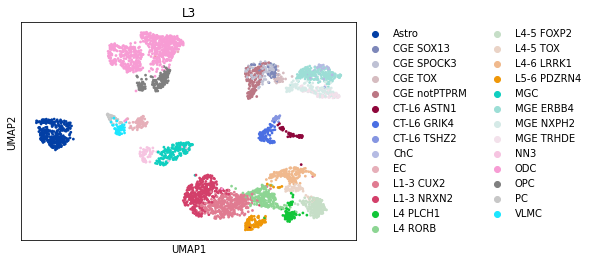

In [34]:
real_temp = sc.AnnData(real_data, obs=pd.DataFrame(adata.obs.loc[test_predictions_top_genes_plus_50.index]['L3']))
sc.tl.pca(real_temp)
sc.pp.neighbors(real_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(real_temp)
sc.pl.umap(real_temp, color='L3')

In [36]:
final_mask = final_mask.loc[real_data.index.values][real_data.columns.values]
final_mask.shape

(3942, 22692)

In [37]:
original_imputed = np.multiply(real_temp.X, final_mask) + np.multiply(test_predictions_top_genes_plus_50.values, 1-final_mask)

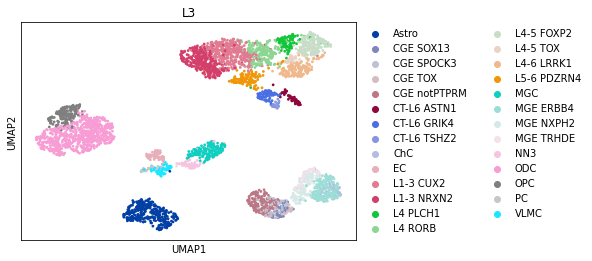

In [38]:
imputed_temp = sc.AnnData(original_imputed, obs=real_temp.obs)
sc.tl.pca(imputed_temp)
sc.pp.neighbors(imputed_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(imputed_temp)
sc.pl.umap(imputed_temp, color='L3')

In [ ]:
test_predictions_top_genes_plus_75 = pd.read_pickle('/content/drive/My Drive/methyl_impute/test_predictions_top_genes_plus_75.pickle')

In [39]:
test_predictions_all_genes = pd.read_pickle('/content/drive/My Drive/methyl_impute/test_predictions_all_genes.pickle')

In [40]:
test_predictions_all_genes = test_predictions_all_genes.drop(['L3'], axis=1)

In [41]:
real_data = adata.to_df().loc[test_predictions_all_genes.index.values][test_predictions_all_genes.columns.values]
real_data.shape

(3942, 44772)

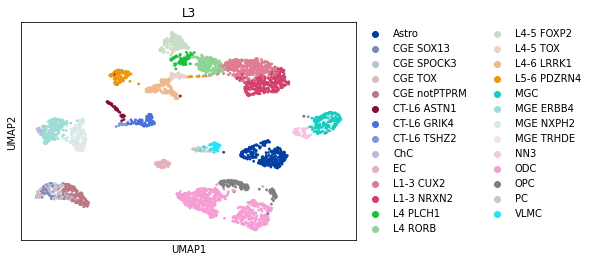

In [42]:
real_temp = sc.AnnData(real_data, obs=pd.DataFrame(adata.obs.loc[test_predictions_all_genes.index]['L3']))
sc.tl.pca(real_temp)
sc.pp.neighbors(real_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(real_temp)
sc.pl.umap(real_temp, color='L3')

In [44]:
final_mask = final_mask.loc[real_data.index.values][real_data.columns.values]
final_mask.shape

(3942, 44772)

In [46]:
original_imputed = np.multiply(real_temp.X, final_mask) + np.multiply(test_predictions_all_genes.values, 1-final_mask)

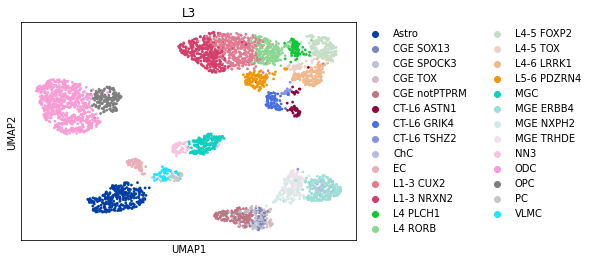

In [47]:
imputed_temp = sc.AnnData(original_imputed, obs=real_temp.obs)
sc.tl.pca(imputed_temp)
sc.pp.neighbors(imputed_temp, n_neighbors=15,n_pcs=20)
sc.tl.umap(imputed_temp)
sc.pl.umap(imputed_temp, color='L3')

In [50]:
print(final_mask.values.sum()/len(final_mask.values.flatten()))

0.5962807873098551


In [ ]:
def get_roc_auc_l3(gen_data, real_data, real_l3):
    gen_labels = gen_data['L3'].values
    gen_data = gen_data.drop(['L3'], axis=1)
    print(gen_data.shape)
    real_data = real_data.loc[gen_data.index][gen_data.columns]
    print(real_data.shape)
    print((gen_labels == real_l3.loc[gen_data.index].values).all())

    binary_l3 = []
    for i in range(len(gen_labels)):
        for j in range(len(gen_labels)):
            if gen_labels[i] == gen_labels[j]:
                binary_l3.append(1)
            else:
                binary_l3.append(0)

    print(len(binary_l3))

    gen_corrs = gen_data.transpose().corr()
    print(gen_corrs.shape)
    real_corrs = real_data.transpose().corr()
    print(real_corrs.shape)

    print(roc_auc_score(binary_l3, gen_corrs.values.flatten()))
    print(roc_auc_score(binary_l3, real_corrs.values.flatten()))

In [ ]:
get_roc_auc_l3(test_predictions_top_genes_plus_25, adata, real_labels)

(3942, 11381)
(3942, 11381)
True
15539364


KeyboardInterrupt: ignored